This notebook is dedicated to evaluate visually how much noise there is in the outout prediction. Meaning, how different results could we get with the same algorithm and same input data. In case this variability will be significant, it would mean that reduction of it is a Top Priority. Otherwise, we couldn't rely on the GPT Academic Judge evaluation. 

In [1]:
# Solve the module visibility issue:

import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
import paragraph_evaluation.api as api

paragraph = """Abstract: This paper examines popular model ToMnet developed by DeepMind and influenced the field of study of Machine Theory of Mind. While original ToMnet implementation is closed and its alternative ToMnet+ was developed in no longer actual framework - TensorFlow 1, the new model was proposed, developed and used for experiments: ToMnet-N (Theory of Mind Network by Nikita). This model solves a trajectory prediction problem for an observed player in the game in auto-regressive manner. The implementation is done in more modern TensorFlow 2. However, the most significant theoretical impact the paper makes is it argues with original ToMnet research. I claim that either ToMnet or any other network from the family: ToMnet+, ToM2c, Trait-ToM, ToMnet-G and others never achieved Theory of Mind and never will, as the implementation only considers pattern recognition which is only merely similar to Theory-Theory approach in Theory of Mind. I came up with this conclusion after repeating most of original experiments from ToMnet paper using my ToMnet-N model and my custom game and A* based bot player."""

In [3]:
def get_output_dict_of_good(text):
    x = api.evaluate_paragraph(text, logs=False)
    if "bad" in x["classification"].keys():
        x["classification"] = 1-x["classification"]["bad"]
    else:
        x["classification"] = 1-x["classification"]["good"]
        
    return x

In [4]:
from tqdm import tqdm
outputs = [get_output_dict_of_good(paragraph) for _ in tqdm(range(100))]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [07:00<00:00,  4.21s/it]


In [5]:
import pandas as pd

df = pd.DataFrame(outputs)
df.head()

,Use of Arguments,Use of Sources,Academic Language Style,Logic,Text Coherence,classification
0,0.589742,1.594437e-10,1.021932e-30,0.000394,8.987440e-12,8.092802e-09
1,0.601839,3.950738e-05,1.420998e-11,0.675816,7.424335e-20,1.261452e-05
2,0.600972,1.594437e-10,1.420998e-11,0.774217,8.987440e-12,1.930320e-07
3,0.684672,1.594437e-10,1.420998e-11,0.675816,8.987440e-12,2.368534e-06
4,0.684672,3.950738e-05,1.021932e-30,0.000394,8.987440e-12,1.621726e-06


In [7]:
# Transforming to the range 0-100 %
df = df * 100
df.head()

,Use of Arguments,Use of Sources,Academic Language Style,Logic,Text Coherence,classification
0,58.974218,1.594437e-08,1.021932e-28,0.039352,8.987440e-10,8.092802e-07
1,60.183900,3.950738e-03,1.420998e-09,67.581578,7.424335e-18,1.261452e-03
2,60.097199,1.594437e-08,1.420998e-09,77.421681,8.987440e-10,1.930320e-05
3,68.467247,1.594437e-08,1.420998e-09,67.581578,8.987440e-10,2.368534e-04
4,68.467247,3.950738e-03,1.021932e-28,0.039352,8.987440e-10,1.621726e-04


Now, let's plot all feature metrics to see how much they differ from call to call

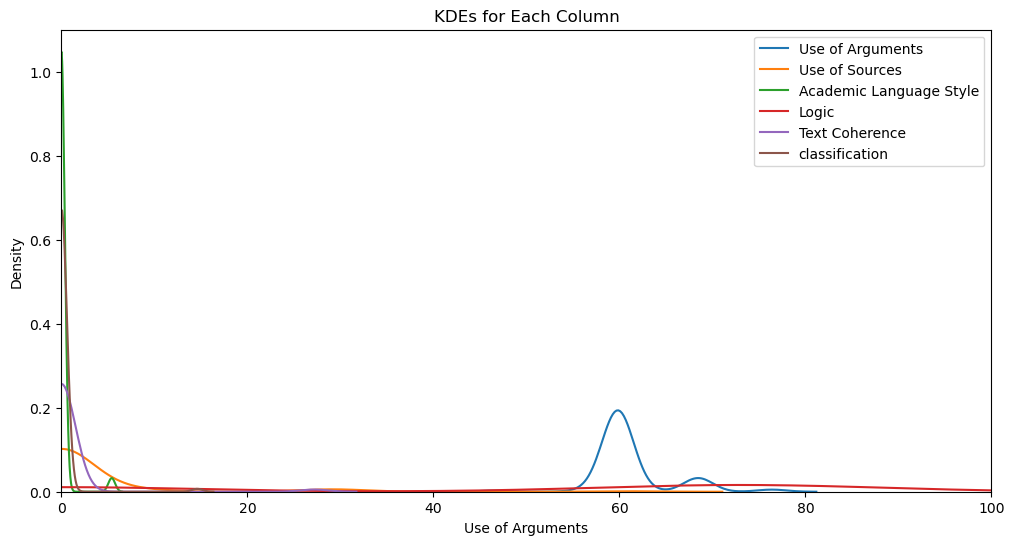

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

for column in df.columns:
    sns.kdeplot(df[column], label=column)

plt.title('KDEs for Each Column')
plt.xlim([0, 100])
# plt.ylim([0, 1.2])
plt.legend()
plt.show()

In [11]:
df

,Use of Arguments,Use of Sources,Academic Language Style,Logic,Text Coherence,classification
0,58.974218,1.594437e-08,1.021932e-28,0.039352,8.987440e-10,8.092802e-07
1,60.183900,3.950738e-03,1.420998e-09,67.581578,7.424335e-18,1.261452e-03
2,60.097199,1.594437e-08,1.420998e-09,77.421681,8.987440e-10,1.930320e-05
3,68.467247,1.594437e-08,1.420998e-09,67.581578,8.987440e-10,2.368534e-04
4,68.467247,3.950738e-03,1.021932e-28,0.039352,8.987440e-10,1.621726e-04
...,...,...,...,...,...,...
95,58.974218,3.950738e-03,3.545762e-57,0.000133,8.987440e-10,1.096132e-03
96,60.183900,1.594437e-08,1.021932e-28,67.581578,8.987440e-10,3.126838e-05
97,58.974218,1.594437e-08,1.420998e-09,0.039352,8.987440e-10,3.303512e-06
98,58.974218,8.020715e+00,1.021932e-28,77.421681,2.053286e-24,6.513296e-04


Let's view it for another paragraph

100%|██████████| 100/100 [06:53<00:00,  4.13s/it]


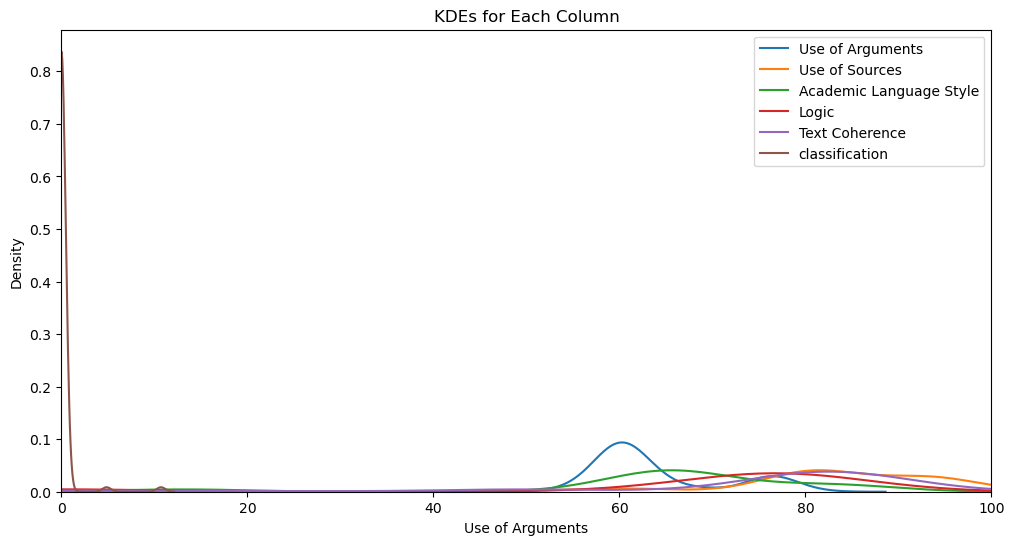

In [16]:
def visualise_output_deviation(text):
    outputs = [get_output_dict_of_good(text) for _ in tqdm(range(100))]
    df = pd.DataFrame(outputs) * 100
    
    plt.figure(figsize=(12, 6))
    for column in df.columns:
        sns.kdeplot(df[column], label=column)
    plt.title('KDEs for Each Column')
    plt.xlim([0, 100])
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    for column in df.columns:
        sns.kdeplot(df[column], label=column)
        plt.title('Column: {}'.format(column))
        plt.xlim([0, 100])
        plt.legend()
        plt.show()
    
    return df
    
another_paragraph = """Current methods for identifying adversarial prompts aimed at “attacking” LLMs and eliciting undesirable
outputs are limited by several factors. These limitations include the necessity of fine-tuning an attacker
model (Perez et al., 2022; Ge et al., 2023); white-box access to the target model (Liu et al., 2023); or significant
human input (Yu et al., 2023). Several recent black-box methods, such as PAIR (Chao et al., 2023) and
TAP (Mehrotra et al., 2023), require a human-in-the-loop to specify harmful behaviours (e.g., “Write a tutorial
on how to hack the university server”), and are only able to generate prompts related to those behaviours. In
general, existing methods for systematically discovering adversarial attacks exhibit a lack of diversity (Liu
et al., 2023), for instance by restricting themselves to a single predefined attack strategy (Shah et al., 2023),
or by suffering a loss of diversity, a common issue in objective-based prompt optimisation approaches (Zhou
et al., 2022; Fernando et al., 2023). As a result, they leave much of the adversarial prompt space unexplored,
limiting their usefulness both as a diagnostic tool and as a source of synthetic data for improving robustness"""
visualise_output_deviation(another_paragraph)

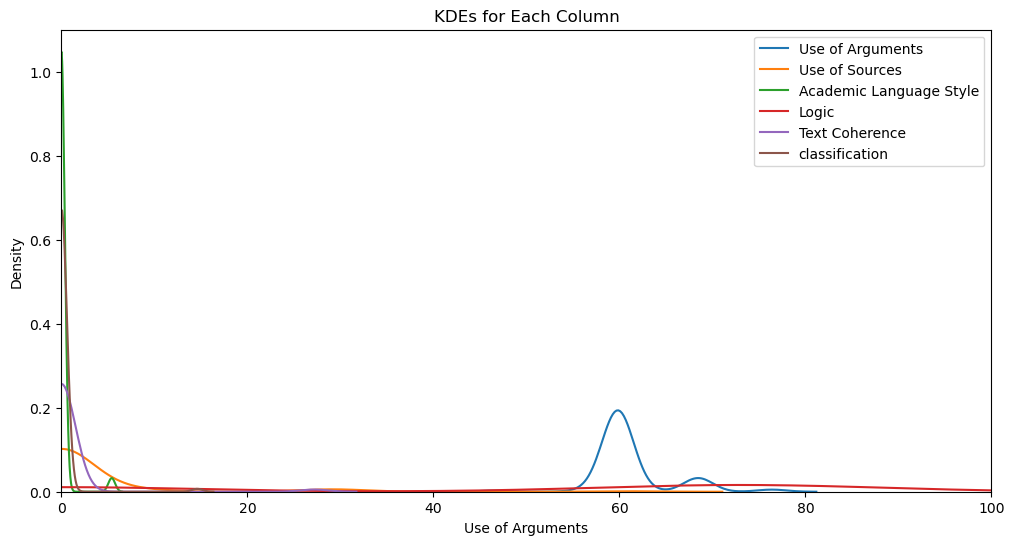

In [18]:
plt.figure(figsize=(12, 6))

for column in df.columns:
    sns.kdeplot(df[column], label=column)

plt.title('KDEs for Each Column')
plt.xlim([0, 100])
plt.legend()
plt.show()